## **I. Problem Understanding**

**Dataset**

Dataset: `yasserh/customer-segmentation-dataset`

Dataset Description: This dataset contains information about 


**Background**  

A retails company XYZ is....


**Acknowledgements:**
This dataset has been referred from UCI ML Repository: https://archive.ics.uci.edu/ml/datasets/online+retail


**Problem Statement**  

**Objective**



**Problem Breakdown**

1. 

2. 

## **II. Data Understanding**

### **II.1 Initial Data Summary**

**Importing Libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings

**Importing Dataset**

In [23]:
df_ori = pd.read_excel("Online Retail.xlsx")

In [24]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Dataset Description**


| Column | Type | Description |
| --- | --- | --- |
| `InvoiceNo` | `Object` | Invoice number |
| `StockCode` | `Object` | Product code |
| `Description` | `Object` | Product name |
| `Quantity` | `int64` | The number of each product bought |
| `InvoiceDate` | `datetime64` | The date of the transaction |
| `UnitPrice` | `float64` | Product price |
| `CustomerID` | `float64` | Customer unique ID |
| `Country` | `Object` | Country name |

In [25]:
df_ori.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [26]:
df_ori.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


**Checking & dropping duplicated data**

In [27]:
df_ori.duplicated().sum()

5268

In [28]:
df_ori.drop_duplicates(inplace=True)
df_ori.duplicated().sum()

0

### **II.2 Exploratory Data Analysis (EDA)**

In [29]:
# Check unique values of object columns
for col in df_ori.columns:
    unique = df_ori[col].value_counts().count()
    print(f"Unique value counts of '{col}': {unique}")

Unique value counts of 'InvoiceNo': 25900
Unique value counts of 'StockCode': 4070
Unique value counts of 'Description': 4223
Unique value counts of 'Quantity': 722
Unique value counts of 'InvoiceDate': 23260
Unique value counts of 'UnitPrice': 1630
Unique value counts of 'CustomerID': 4372
Unique value counts of 'Country': 38


**TOP 10 Countries**

In [30]:
top_country = df_ori['Country'].value_counts().head(10)

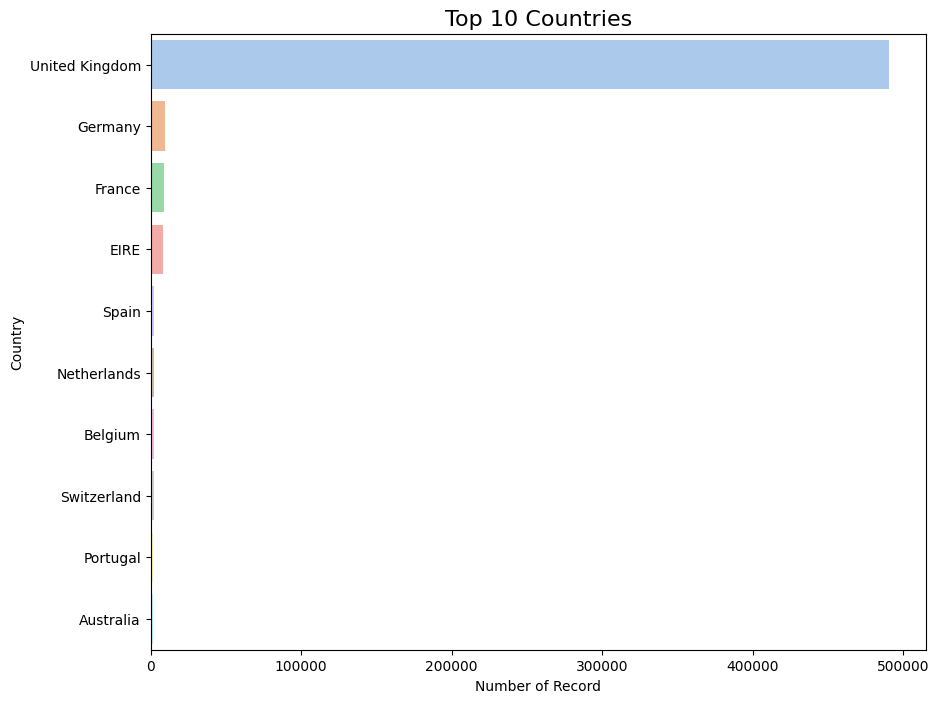

In [53]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top_country.values, y=top_country.index, palette='pastel', hue=top_country.index, legend=False)
plt.title("Top 10 Countries", fontsize=16)
plt.xlabel("Number of Record")
plt.ylabel("Country")
plt.show()

**TOP 5 Purchase Year**

In [32]:
top_year = df_ori['InvoiceDate'].dt.year.value_counts().head(10)
top_year

InvoiceDate
2011    494660
2010     41981
Name: count, dtype: int64

**TOP 5 Purchase Month**

In [33]:
top_month = df_ori['InvoiceDate'].dt.month.value_counts().head(5)

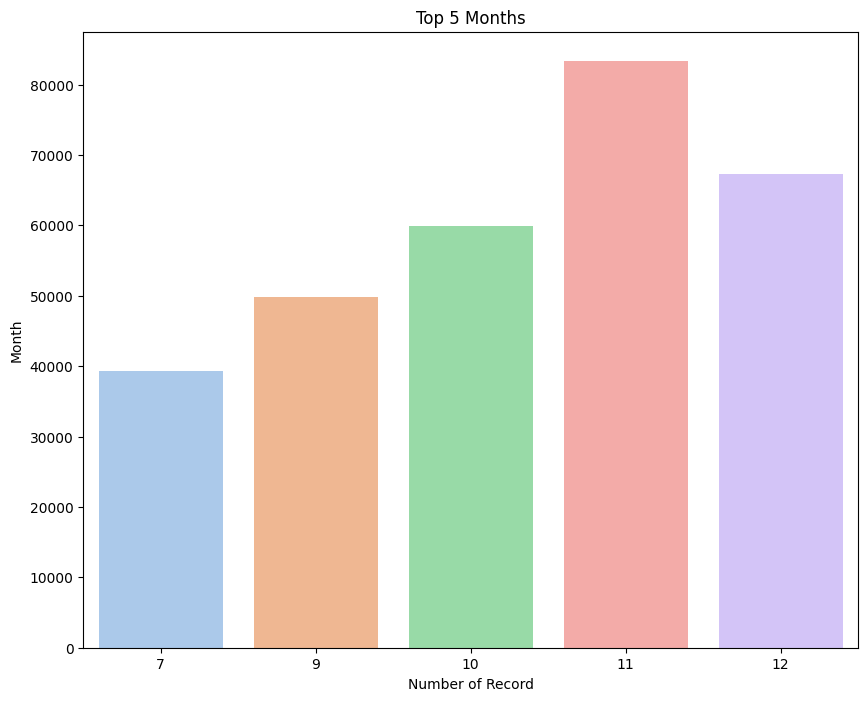

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_month.index, y=top_month.values, hue=top_month.index, palette='pastel', legend=False)
plt.title('Top 5 Months')
plt.xlabel('Number of Record')
plt.ylabel('Month')
plt.show()

**TOP 10 Purchase Days**

In [35]:
top_days = df_ori['InvoiceDate'].dt.day_name().value_counts()

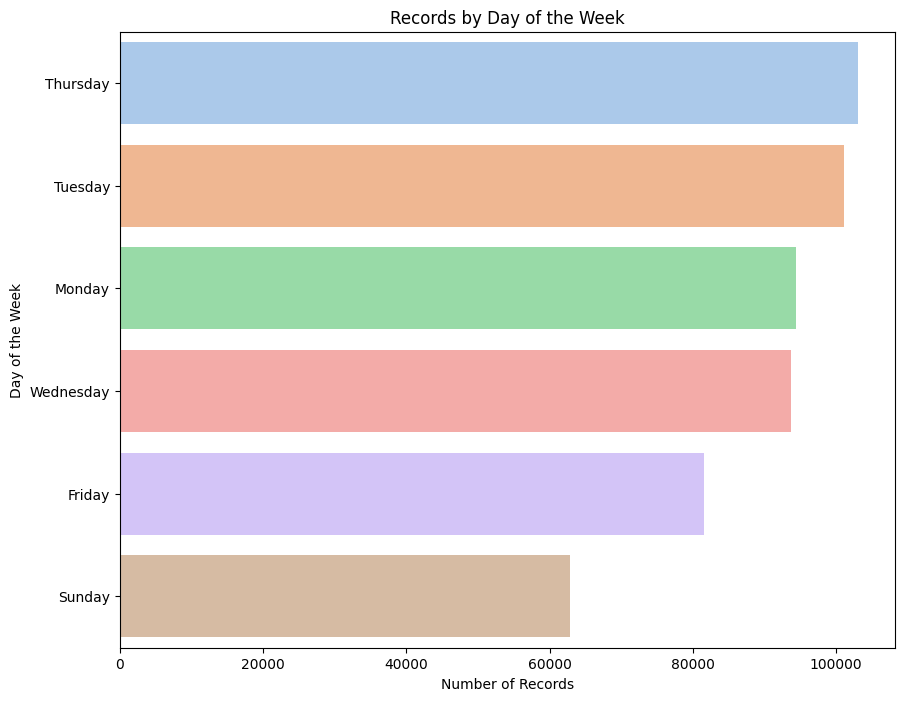

In [49]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top_days.values, y=top_days.index, palette='pastel', hue=top_days.index, legend=False)
plt.title('Records by Day of the Week')
plt.xlabel('Number of Records')
plt.ylabel('Day of the Week')
plt.show()


**TOP 10 Purchase Dates**

In [37]:
top_dates = df_ori['InvoiceDate'].value_counts().head(10)

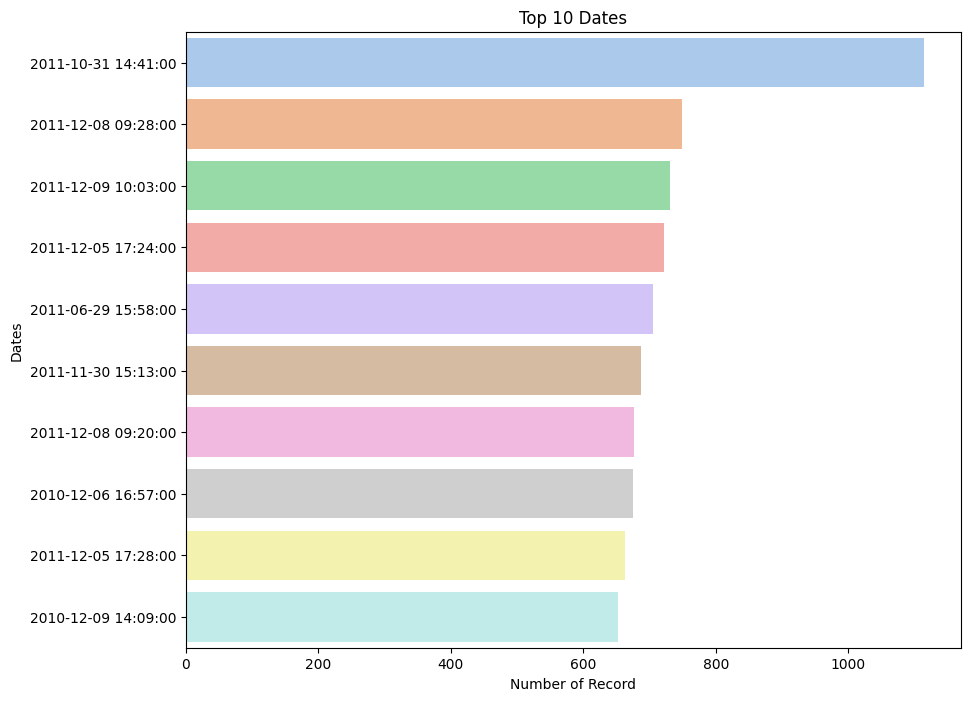

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(x=top_dates.values, y=top_dates.index, palette='pastel', hue=top_dates.index, legend=False)
plt.title('Top 10 Dates')
plt.xlabel('Number of Record')
plt.ylabel('Dates')
plt.show()

**TOP 10 Items**

In [39]:
top_items = df_ori['Description'].value_counts().head(10)

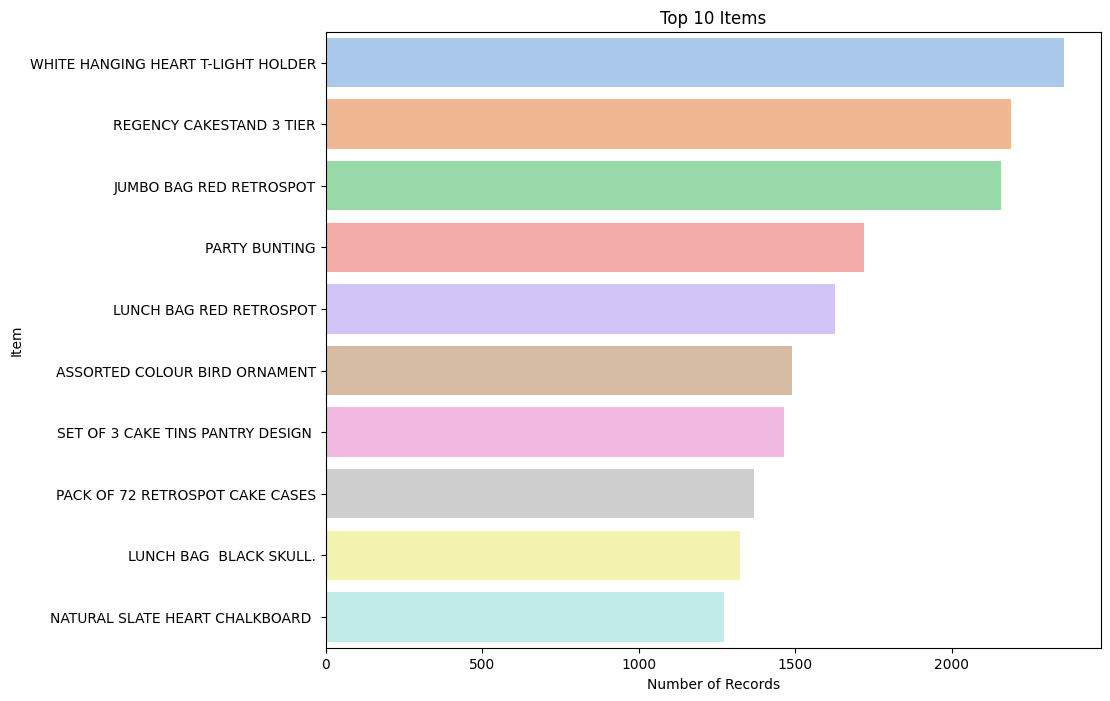

In [52]:
plt.figure(figsize=(10, 8))
sns.barplot(x=top_items.values, y=top_items.index, palette='pastel', hue=top_items.index, legend=False)
plt.title('Top 10 Items')
plt.xlabel('Number of Records')
plt.ylabel('Item')
plt.show()

**Chi-Squared Test**

In [41]:
# Creating contingency table
contingency_table = pd.crosstab(df_ori['Quantity'], df_ori['InvoiceDate'].dt.day_name())
contingency_table

InvoiceDate,Friday,Monday,Sunday,Thursday,Tuesday,Wednesday
Quantity,,,,,,
-80995,1,0,0,0,0,0
-74215,0,0,0,0,1,0
-9600,0,0,0,0,2,0
-9360,0,0,0,1,0,0
-9058,0,0,0,0,1,0
...,...,...,...,...,...,...
4800,0,0,0,1,0,0
5568,1,0,0,0,0,0
12540,1,0,0,0,0,0


In [42]:
# Chiq-squared Test
result = stats.chi2_contingency(contingency_table)
print("P-value:", result.pvalue)

if result.pvalue < 0.05:
    print("Succeed to reject H0: There is a relationship between quantity and the day of purchase.")
else:
    print("Failed to reject H0: There is no relationship between quantity and the day of purchase.")

P-value: 0.0
Succeed to reject H0: There is a relationship between quantity and the day of purchase.


## **III. Data Preparation: Feature Engineering**

## **IV. Modelling**

### **IV.1 Model Definition**

### **IV.2 Model Training**

## **V. Evaluation**

## **Conclusion**